To increase the accuracy of AlexNet, you can try the following strategies:

1. Data Augmentation: Apply various data augmentation techniques such as rotation, scaling, flipping, and cropping to increase the diversity of your training data. This helps the model generalize better and improve its accuracy.

2. Regularization: Apply regularization techniques such as L1 or L2 regularization to prevent overfitting. This helps the model generalize better to unseen data and improve its accuracy.

3. Batch Normalization: Add batch normalization layers after each convolutional layer. Batch normalization helps in normalizing the activations of the previous layer, reducing the internal covariate shift, and improving the stability and accuracy of the network.

4. Learning Rate Scheduling: Implement a learning rate schedule to adjust the learning rate during training. Decreasing the learning rate over time can help the model converge better and achieve higher accuracy.

5. Increase Model Capacity: You can try increasing the number of filters in the convolutional layers or adding more convolutional layers to increase the model's capacity. This allows the model to learn more complex features and potentially improve accuracy.

6. Hyperparameter Tuning: Experiment with different hyperparameters such as learning rate, batch size, optimizer, and activation functions to find the optimal configuration for your model.

7. Ensembling: Train multiple instances of AlexNet with different initializations or variations in the training process and combine their predictions to improve accuracy. This technique is called model ensembling and can often lead to better results.

It's important to note that the effectiveness of these strategies may vary depending on your specific dataset and problem. It's recommended to experiment with different approaches and evaluate their impact on the model's accuracy.

In [2]:
!pip install tensorflow
!pip install tensorflow==2.4.0
import numpy as np
import cv2
import os
import tensorflow as tf
from tensorflow.keras.initializers import glorot_uniform
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.regularizers import l2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import LearningRateScheduler, ModelCheckpoint
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import seaborn as sn
import matplotlib.pyplot as plt
import pandas as pd
import imutils
from imutils.contours import sort_contours
from tensorflow.keras.layers import Input, Conv2D, Activation, MaxPool2D, Flatten, Dense, Dropout, BatchNormalization

ERROR: Could not find a version that satisfies the requirement tensorflow==2.4.0 (from versions: 2.5.0, 2.5.1, 2.5.2, 2.5.3, 2.6.0rc0, 2.6.0rc1, 2.6.0rc2, 2.6.0, 2.6.1, 2.6.2, 2.6.3, 2.6.4, 2.6.5, 2.7.0rc0, 2.7.0rc1, 2.7.0, 2.7.1, 2.7.2, 2.7.3, 2.7.4, 2.8.0rc0, 2.8.0rc1, 2.8.0, 2.8.1, 2.8.2, 2.8.3, 2.8.4, 2.9.0rc0, 2.9.0rc1, 2.9.0rc2, 2.9.0, 2.9.1, 2.9.2, 2.9.3, 2.10.0rc0, 2.10.0rc1, 2.10.0rc2, 2.10.0rc3, 2.10.0, 2.10.1, 2.11.0rc0, 2.11.0rc1, 2.11.0rc2, 2.11.0, 2.11.1, 2.12.0rc0, 2.12.0rc1, 2.12.0, 2.12.1, 2.13.0rc0, 2.13.0rc1, 2.13.0rc2, 2.13.0)
ERROR: No matching distribution found for tensorflow==2.4.0


In [3]:
import sys
print(sys.executable)

C:\Users\pahadian\Anaconda3\python.exe


In [3]:
import urllib.request

url = "https://cainvas-static.s3.amazonaws.com/media/user_data/Yuvnish17/data.zip"
filename = "data.zip" 

urllib.request.urlretrieve(url, filename)

('data.zip', <http.client.HTTPMessage at 0x237bb19a3d0>)

In [4]:
import zipfile

with zipfile.ZipFile('data.zip', 'r') as zip_ref:
    zip_ref.extractall('dataCaption') 


In [5]:
x = []
y = []
datadir = 'dataaa/dataset'
for folder in os.listdir(datadir):
    path = os.path.join(datadir, folder)
    for images in os.listdir(path):
        img = cv2.imread(os.path.join(path, images))
        x.append(img)
        y.append(folder)
        
print(len(x))
print(len(y))
print(f'labels : {list(set(y))}')

3500
3500
labels : ['fraction', 'non-fraction']


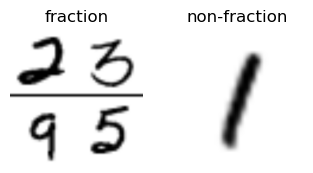

In [6]:
import matplotlib.pyplot as plt
figure = plt.figure(figsize=(10, 10))
j = 0
for i in list(set(y)):
    idx = y.index(i)
    img = x[idx]
    img = cv2.resize(img, (256, 256))
    figure.add_subplot(5, 5, j+1)
    plt.imshow(img)
    plt.axis('off')
    plt.title(i)
    j += 1

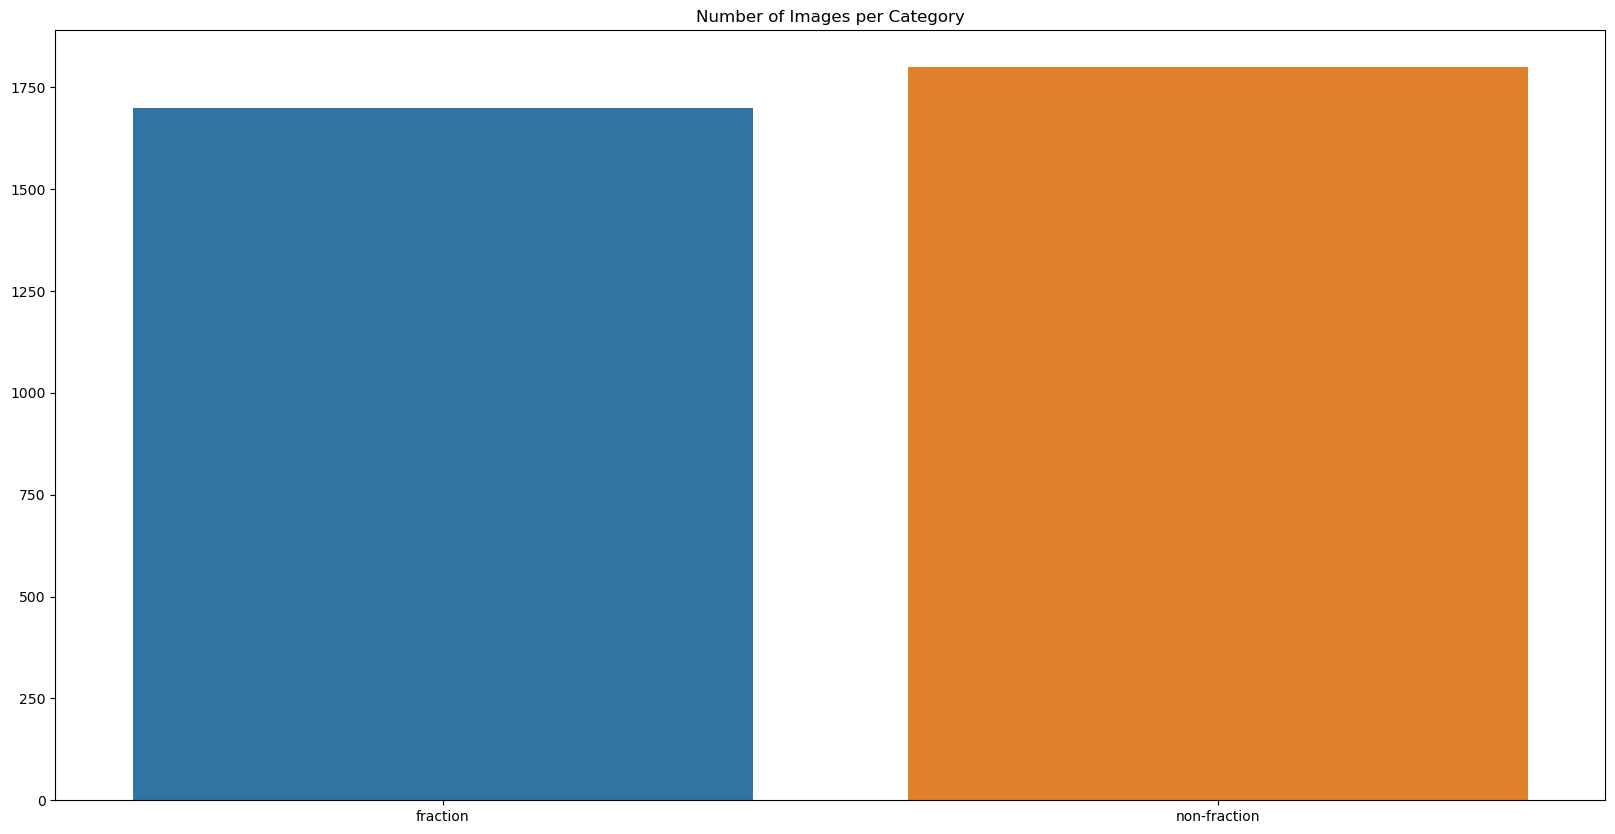

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
unique, count = np.unique(y, return_counts=True)
figure = plt.figure(figsize=(20, 10))
sns.barplot(x=unique, y=count).set_title('Number of Images per Category')
plt.show()

In [8]:
X = []
for i in range(len(x)):
#     print(i)
    img = x[i]
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    threshold_image = cv2.threshold(img_gray, 0, 255, cv2.THRESH_BINARY_INV|cv2.THRESH_OTSU)[1]
    threshold_image = cv2.resize(threshold_image, (32, 32))
    X.append(threshold_image)
print(len(X))


3500


In [9]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
print(len(y))

3500


In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2)

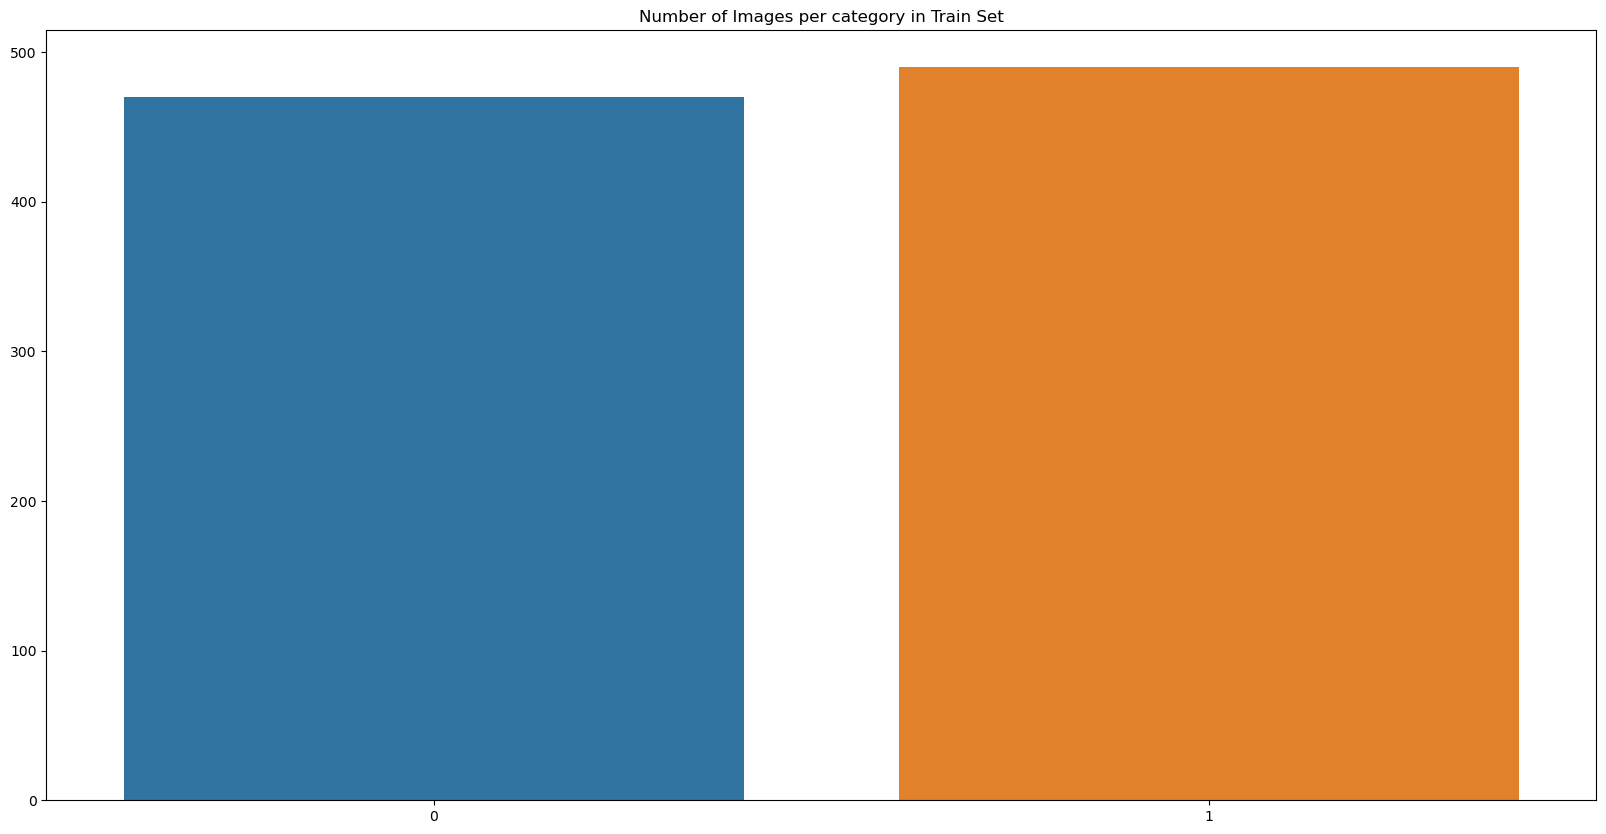

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
unique_train, count_train = np.unique(Y_train, return_counts=True)
figure = plt.figure(figsize=(20, 10))
sns.barplot(x=unique_train, y=count_train).set_title('Number of Images per category in Train Set')
plt.show()

In [9]:
!pip install tensorflow
import tensorflow as tf

In [10]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential

In [11]:
!pip install tensorflow
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
import numpy as np

!pip install tensorflow

import tensorflow as tf

X_train = np.array(X_train)
X_test = np.array(X_test)
Y_train = np.array(Y_train)
Y_test = np.array(Y_test)

Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)

X_train = np.expand_dims(X_train, axis=-1)
X_test = np.expand_dims(X_test, axis=-1)

# Normalize the input data
X_train = X_train/255.
X_test = X_test/255.

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(960, 32, 32, 1)
(240, 32, 32, 1)
(960, 2)
(240, 2)


In [12]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

input_shape = (32, 32, 1)

model = Sequential()

# Layer 1
model.add(Conv2D(96, (11, 11), strides=(4, 4), padding='valid', activation='relu', input_shape=input_shape))

# Layer 2
model.add(Conv2D(256, (5, 5), strides=(1, 1), padding='same', activation='relu'))
model.add(MaxPooling2D((3, 3), strides=(2, 2)))

# Layer 3
model.add(Conv2D(384, (3, 3), strides=(1, 1), padding='same', activation='relu'))

# Layer 4
model.add(Conv2D(384, (3, 3), strides=(1, 1), padding='same', activation='relu'))

# Layer 5
model.add(Conv2D(256, (3, 3), strides=(1, 1), padding='same', activation='relu'))

# Flatten the output
model.add(Flatten())

# Fully Connected Layers
model.add(Dense(4096, activation='relu'))
model.add(Dense(4096, activation='relu'))
model.add(Dense(2, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Normalization
X_train = X_train / 255.0
X_test = X_test / 255.0

# Train the model
model.fit(X_train, Y_train, batch_size=32, epochs=100, validation_data=(X_test, Y_test))


Epoch 1/10
30/30 [==============================] - 7s 209ms/step - loss: 0.6977 - accuracy: 0.5010 - val_loss: 0.6943 - val_accuracy: 0.4583
Epoch 2/10
30/30 [==============================] - 6s 191ms/step - loss: 0.6937 - accuracy: 0.5104 - val_loss: 0.6958 - val_accuracy: 0.4583
Epoch 3/10
30/30 [==============================] - 6s 199ms/step - loss: 0.6931 - accuracy: 0.5104 - val_loss: 0.6944 - val_accuracy: 0.4583
Epoch 4/10
30/30 [==============================] - 6s 204ms/step - loss: 0.6931 - accuracy: 0.5104 - val_loss: 0.6955 - val_accuracy: 0.4583
Epoch 5/10
30/30 [==============================] - 6s 192ms/step - loss: 0.6931 - accuracy: 0.5104 - val_loss: 0.6951 - val_accuracy: 0.4583
Epoch 6/10
30/30 [==============================] - 6s 199ms/step - loss: 0.6931 - accuracy: 0.5104 - val_loss: 0.6941 - val_accuracy: 0.4583
Epoch 7/10
30/30 [==============================] - 6s 203ms/step - loss: 0.6930 - accuracy: 0.5104 - val_loss: 0.6947 - val_accuracy: 0.4583
Epoch 

In [13]:
def step_decay(epoch):
    initial_learning_rate = 0.001
    dropEvery = 10
    factor = 0.5
    lr = initial_learning_rate*(factor**np.floor((1 + epoch)/dropEvery))
    return float(lr)

checkpoint = ModelCheckpoint('maths_symbol_and_digits_recognition.h5', 
                             monitor='val_loss', save_best_only=True, 
                             verbose=1, mode='min')

callbacks = [checkpoint, LearningRateScheduler(step_decay)]

In [14]:
print(X_train.shape)
print(X_test.shape)

(960, 32, 32, 1)
(240, 32, 32, 1)


In [15]:
for layer in model.layers:
    print(layer.get_config())

{'name': 'conv2d', 'trainable': True, 'batch_input_shape': (None, 32, 32, 1), 'dtype': 'float32', 'filters': 96, 'kernel_size': (11, 11), 'strides': (4, 4), 'padding': 'valid', 'data_format': 'channels_last', 'dilation_rate': (1, 1), 'groups': 1, 'activation': 'relu', 'use_bias': True, 'kernel_initializer': {'class_name': 'GlorotUniform', 'config': {'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}
{'name': 'conv2d_1', 'trainable': True, 'dtype': 'float32', 'filters': 256, 'kernel_size': (5, 5), 'strides': (1, 1), 'padding': 'same', 'data_format': 'channels_last', 'dilation_rate': (1, 1), 'groups': 1, 'activation': 'relu', 'use_bias': True, 'kernel_initializer': {'class_name': 'GlorotUniform', 'config': {'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'bias_regularizer': No

In [16]:
aug = ImageDataGenerator(zoom_range=0.1,
                         width_shift_range=0.05,
                         height_shift_range=0.05)

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
#hist = model.fit(aug.flow(X_train, Y_train, batch_size=128), epochs=100, validation_data=(X_test, Y_test))
hist = model.fit(aug.flow(X_train, Y_train, batch_size=32), epochs=100, validation_data=(X_test, Y_test))


Epoch 1/100
30/30 [==============================] - 6s 198ms/step - loss: 0.6932 - accuracy: 0.5104 - val_loss: 0.6955 - val_accuracy: 0.4583
Epoch 2/100
30/30 [==============================] - 6s 191ms/step - loss: 0.6932 - accuracy: 0.5104 - val_loss: 0.6942 - val_accuracy: 0.4583
Epoch 3/100
30/30 [==============================] - 6s 204ms/step - loss: 0.6932 - accuracy: 0.5104 - val_loss: 0.6951 - val_accuracy: 0.4583
Epoch 4/100
30/30 [==============================] - 6s 200ms/step - loss: 0.6930 - accuracy: 0.5104 - val_loss: 0.6948 - val_accuracy: 0.4583
Epoch 5/100
30/30 [==============================] - 6s 203ms/step - loss: 0.6931 - accuracy: 0.5104 - val_loss: 0.6946 - val_accuracy: 0.4583
Epoch 6/100
30/30 [==============================] - 6s 202ms/step - loss: 0.6930 - accuracy: 0.5104 - val_loss: 0.6946 - val_accuracy: 0.4583
Epoch 7/100
30/30 [==============================] - 6s 203ms/step - loss: 0.6930 - accuracy: 0.5104 - val_loss: 0.6947 - val_accuracy: 0.4583

Epoch 58/100
30/30 [==============================] - 6s 207ms/step - loss: 0.6930 - accuracy: 0.5104 - val_loss: 0.6951 - val_accuracy: 0.4583
Epoch 59/100
30/30 [==============================] - 6s 211ms/step - loss: 0.6930 - accuracy: 0.5104 - val_loss: 0.6952 - val_accuracy: 0.4583
Epoch 60/100
30/30 [==============================] - 6s 206ms/step - loss: 0.6930 - accuracy: 0.5104 - val_loss: 0.6950 - val_accuracy: 0.4583
Epoch 61/100
30/30 [==============================] - 6s 203ms/step - loss: 0.6930 - accuracy: 0.5104 - val_loss: 0.6950 - val_accuracy: 0.4583
Epoch 62/100
30/30 [==============================] - 7s 221ms/step - loss: 0.6930 - accuracy: 0.5104 - val_loss: 0.6952 - val_accuracy: 0.4583
Epoch 63/100
30/30 [==============================] - 6s 214ms/step - loss: 0.6930 - accuracy: 0.5104 - val_loss: 0.6949 - val_accuracy: 0.4583
Epoch 64/100
30/30 [==============================] - 6s 212ms/step - loss: 0.6931 - accuracy: 0.5104 - val_loss: 0.6951 - val_accuracy:

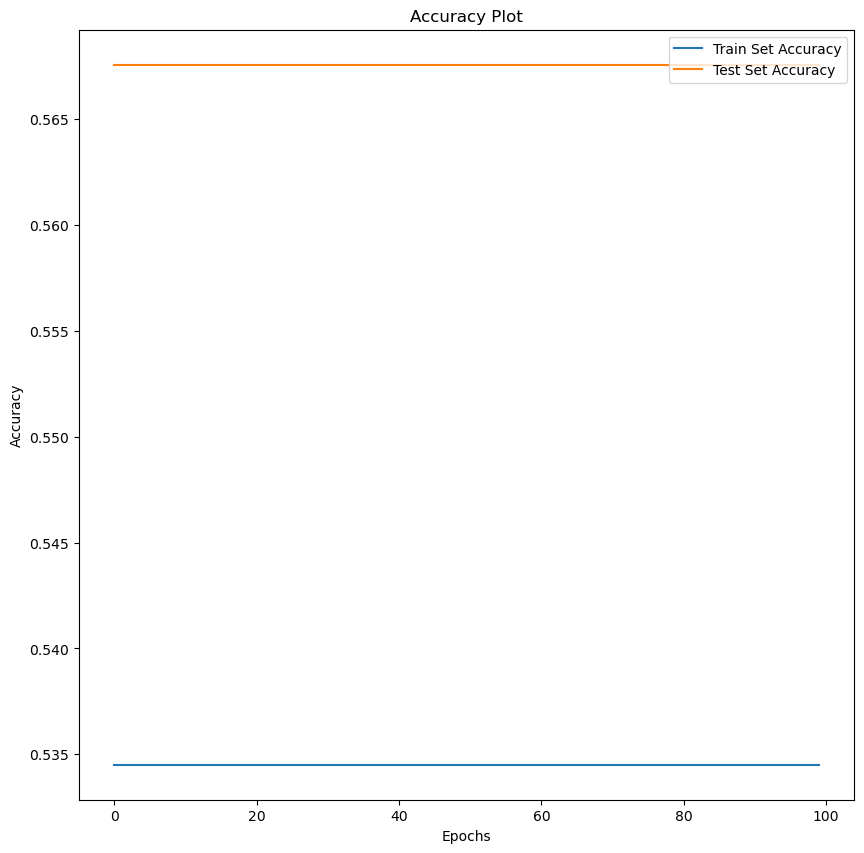

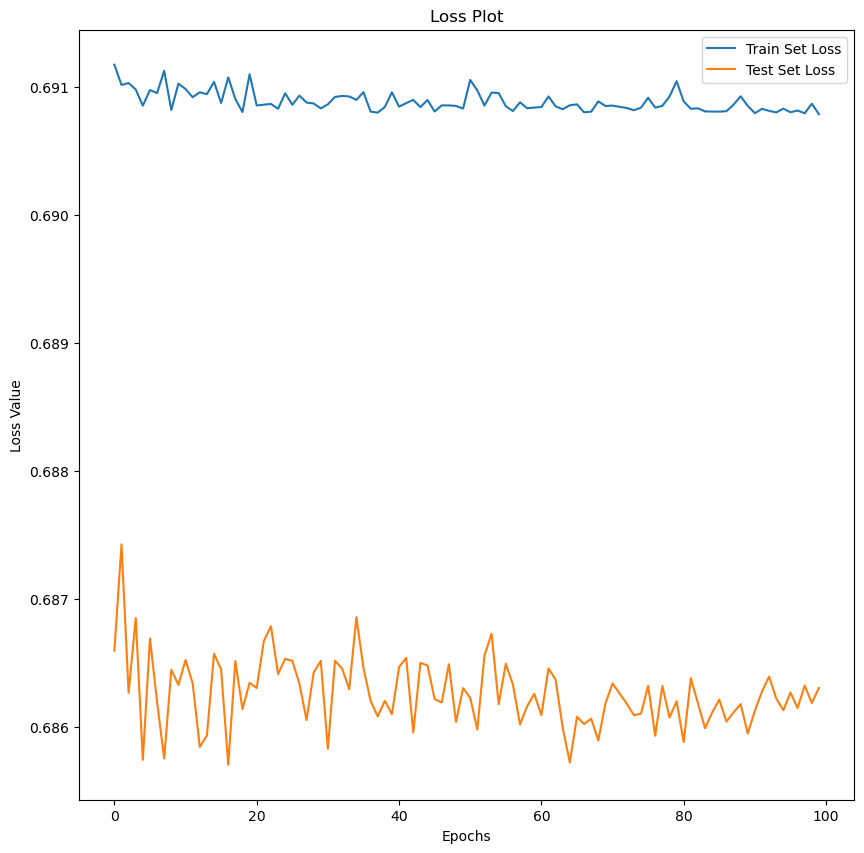

In [20]:
import matplotlib.pyplot as plt

# Accuracy Plot
figure = plt.figure(figsize=(10, 10))
plt.plot(hist.history['accuracy'], label='Train Set Accuracy')
plt.plot(hist.history['val_accuracy'], label='Test Set Accuracy')
plt.title('Accuracy Plot')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='upper right')
plt.show()

# Loss Plot
figure2 = plt.figure(figsize=(10, 10))
plt.plot(hist.history['loss'], label='Train Set Loss')
plt.plot(hist.history['val_loss'], label='Test Set Loss')
plt.title('Loss Plot')
plt.xlabel('Epochs')
plt.ylabel('Loss Value')
plt.legend(loc='upper right')
plt.show()


In [21]:
print(hist.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [22]:
ypred = model.predict(X_test)
ypred = np.argmax(ypred, axis=1)
Y_test_hat = np.argmax(Y_test, axis=1)
print(classification_report(Y_test_hat, ypred))

18/18 [==============================] - 1s 33ms/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       240
           1       0.57      1.00      0.72       315

    accuracy                           0.57       555
   macro avg       0.28      0.50      0.36       555
weighted avg       0.32      0.57      0.41       555



C:\Users\pahadian\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\pahadian\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\pahadian\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [24]:
def test_pipeline(image_path):
    img = cv2.imread(image_path)
    img = cv2.resize(img, (800, 800))
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # blurred = cv2.GaussianBlur(img_gray, (3, 3), 0)
    edged = cv2.Canny(img_gray, 30, 150)
    contours = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    contours = imutils.grab_contours(contours)
    contours = sort_contours(contours, method="left-to-right")[0]
    labels = ['non-fraction', 'fraction']
    for c in contours:
        (x, y, w, h) = cv2.boundingRect(c)
        if 20<=w and 30<=h:
            roi = img_gray[y:y+h, x:x+w]
            thresh = cv2.threshold(roi, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
            (th, tw) = thresh.shape
            if tw > th:
                thresh = imutils.resize(thresh, width=32)
            if th > tw:
                thresh = imutils.resize(thresh, height=32)
            (th, tw) = thresh.shape
            dx = int(max(0, 32 - tw)/2.0)
            dy = int(max(0, 32 - th) / 2.0)
            padded = cv2.copyMakeBorder(thresh, top=dy, bottom=dy, left=dx, right=dx, borderType=cv2.BORDER_CONSTANT,
                                       value=(0, 0, 0))
            padded = cv2.resize(padded, (32, 32))
            padded = np.array(padded)
            padded = padded/255.
            padded = np.expand_dims(padded, axis=0)
            padded = np.expand_dims(padded, axis=-1)
            pred = model.predict(padded)
            pred = np.argmax(pred, axis=1)
            label = labels[pred[0]]
            cv2.rectangle(img, (x, y), (x+w, y+h), (0, 0, 255), 2)
            cv2.putText(img, label, (x-5, y), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255))

    figure = plt.figure(figsize=(10, 10))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.axis('off')
    plt.show()

1/1 [==============================] - 0s 37ms/step


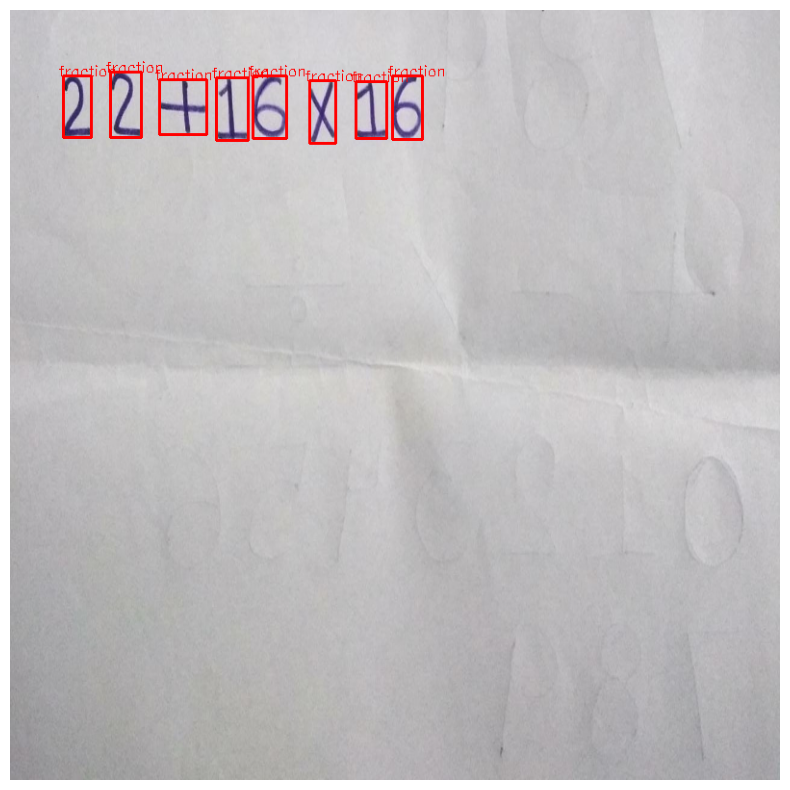

AttributeError: 'NoneType' object has no attribute 'count'

In [25]:
detected_labels = test_pipeline('mytest.jpg')

fraction_count = detected_labels.count('fraction')

print('Number of fraction objects:', fraction_count)

1/1 [==============================] - 0s 37ms/step


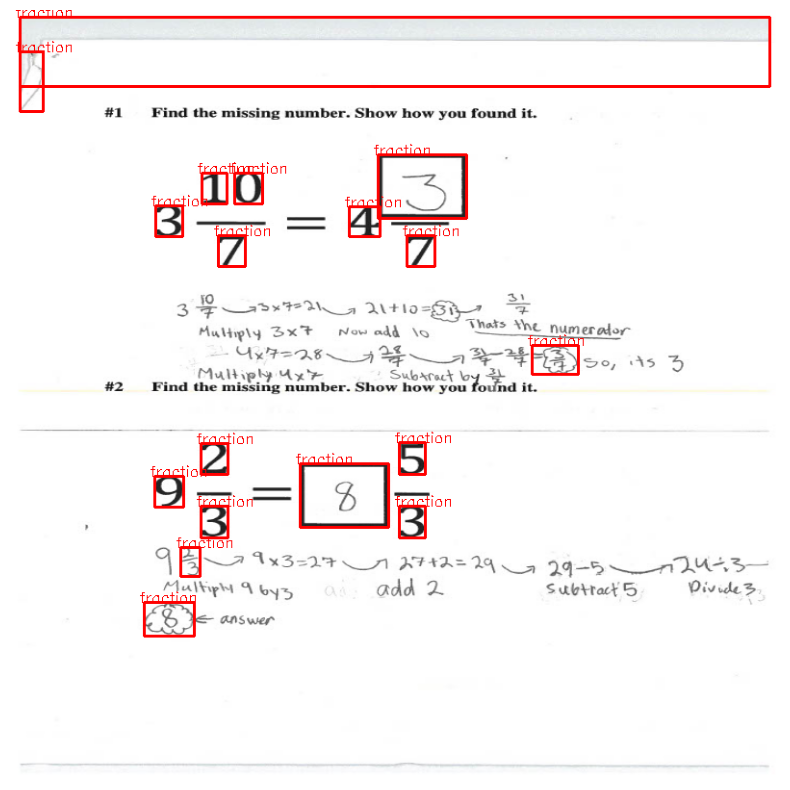

AttributeError: 'NoneType' object has no attribute 'count'

In [26]:
detected_labels = test_pipeline('5.jpg')

fraction_count = detected_labels.count('fraction')

print('Number of fraction objects:', fraction_count)

1/1 [==============================] - 0s 32ms/step


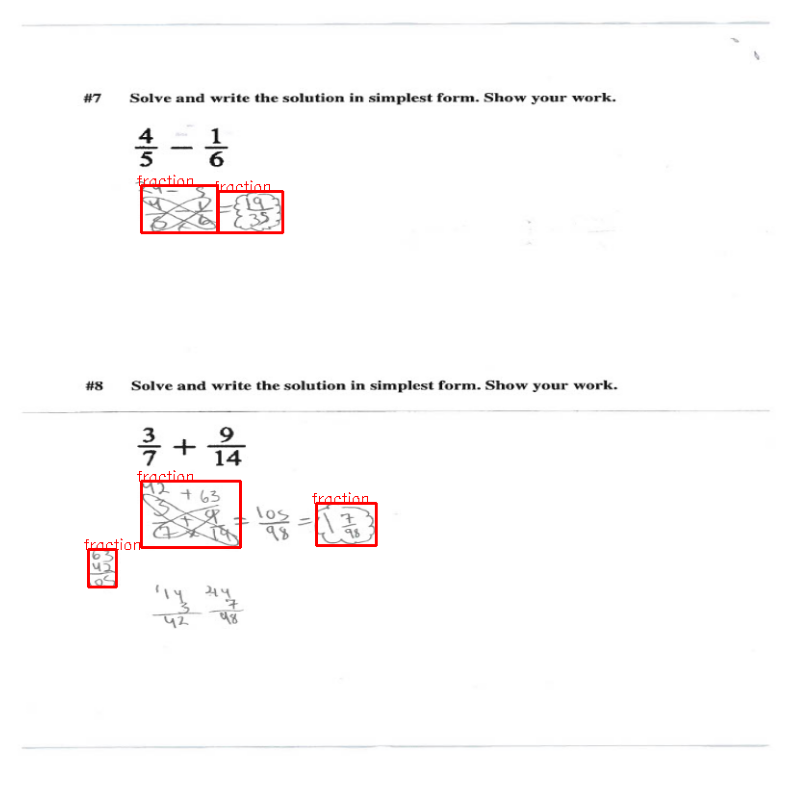

tt.png


In [27]:
test_pipeline('6.jpg')
print('tt.png')

1/1 [==============================] - 0s 40ms/step


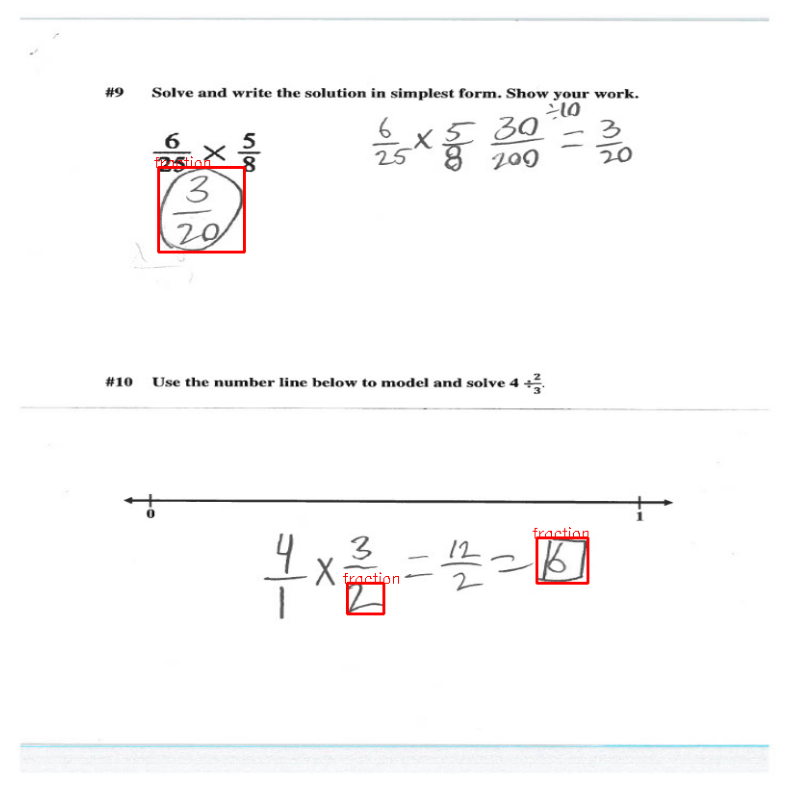

In [28]:
test_pipeline('Grade6_sample11024_17.jpg')


1/1 [==============================] - 0s 39ms/step


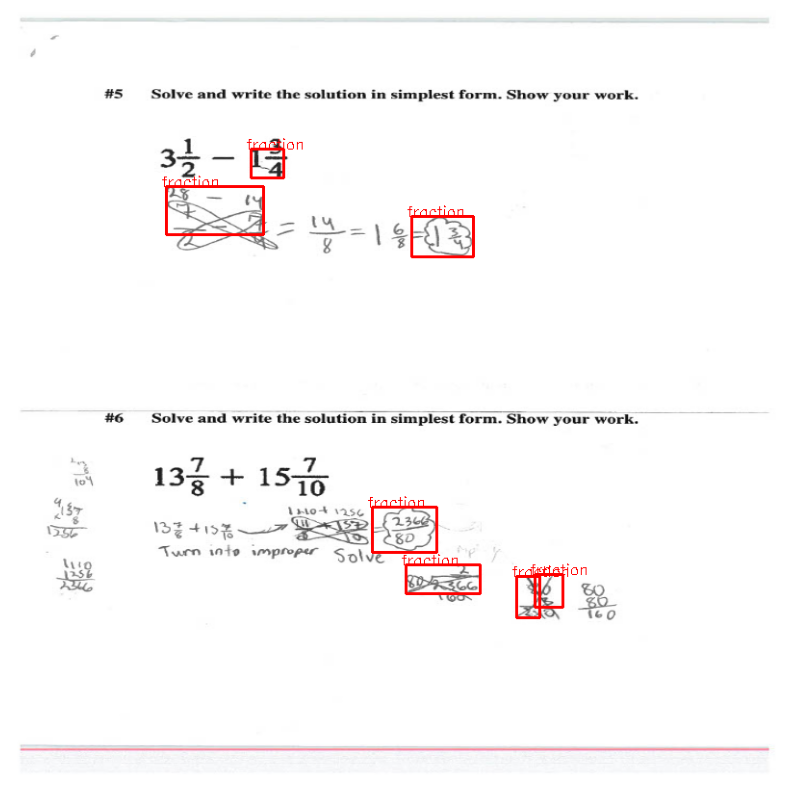

In [29]:
test_pipeline('Grade6_sample11024_3.jpg')

1/1 [==============================] - 0s 38ms/step


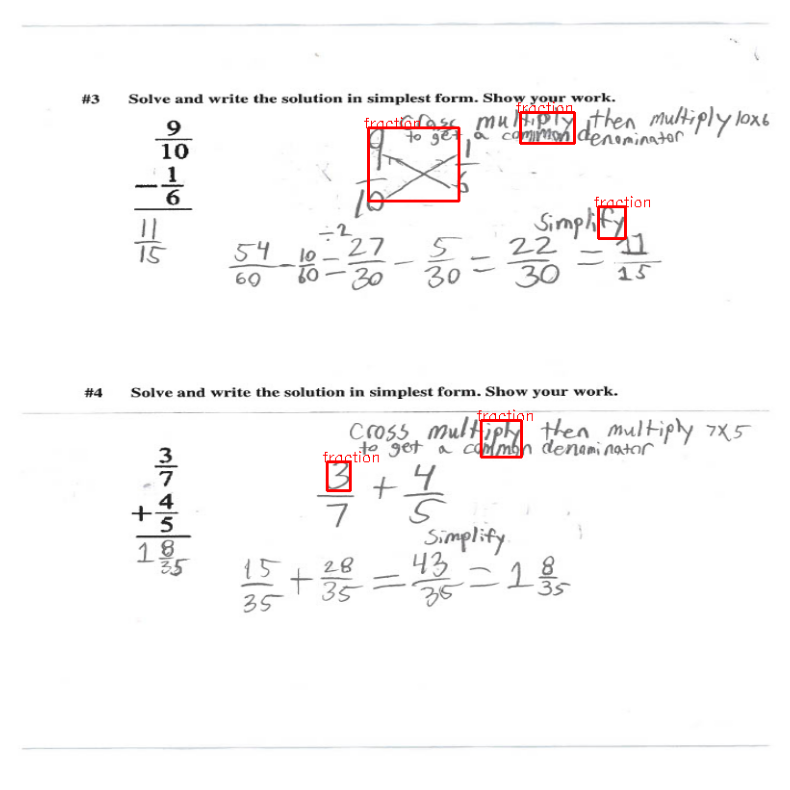

In [30]:
test_pipeline('Grade6_sample11024_14.jpg')

1/1 [==============================] - 0s 41ms/step


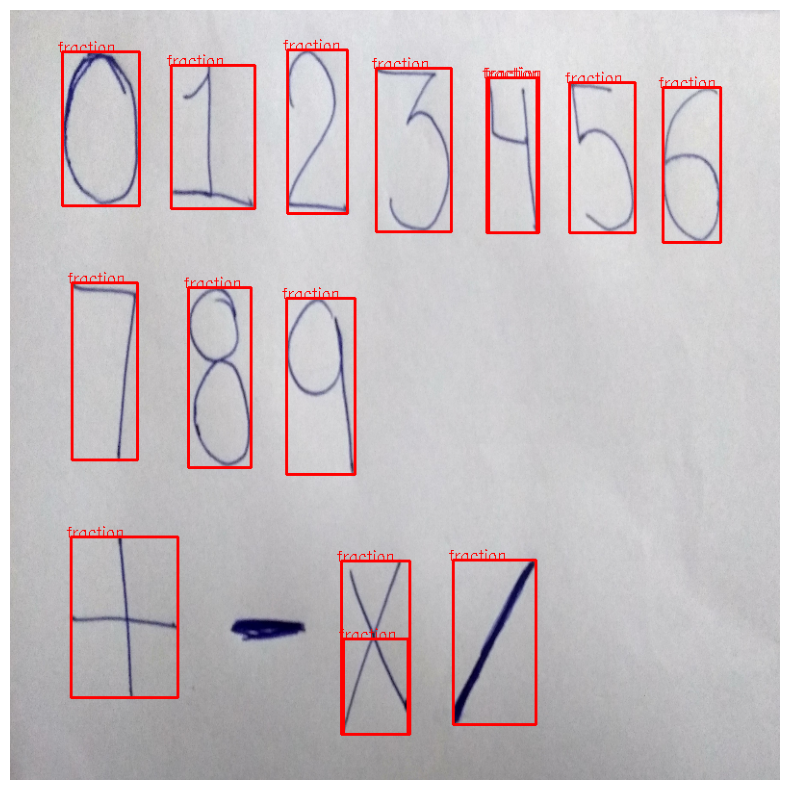

In [31]:
test_pipeline('test.jpg')

1/1 [==============================] - 0s 32ms/step


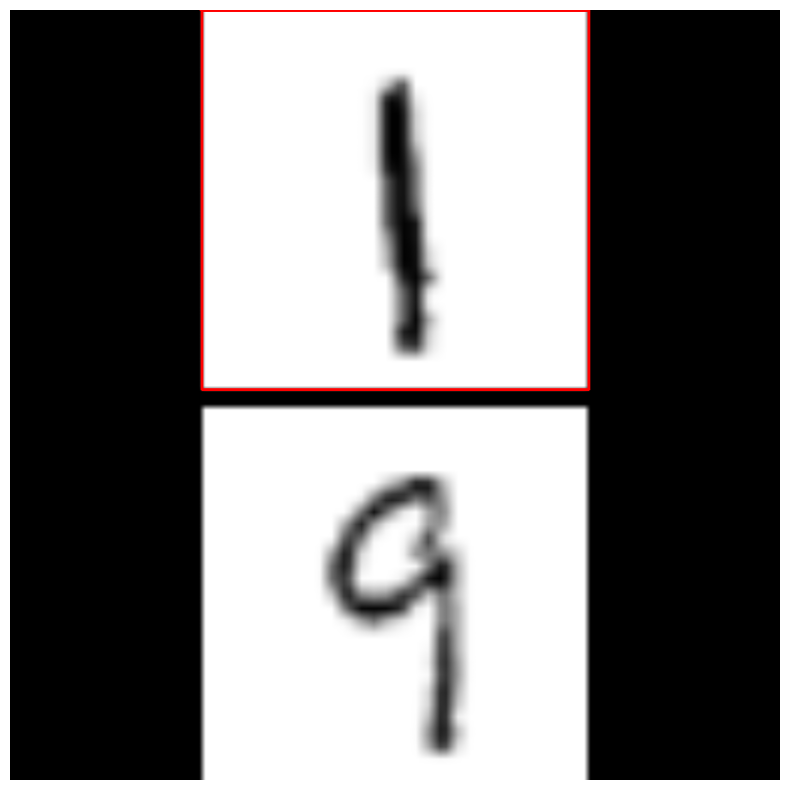

In [32]:
test_pipeline('_new__new_fraction_24.png')

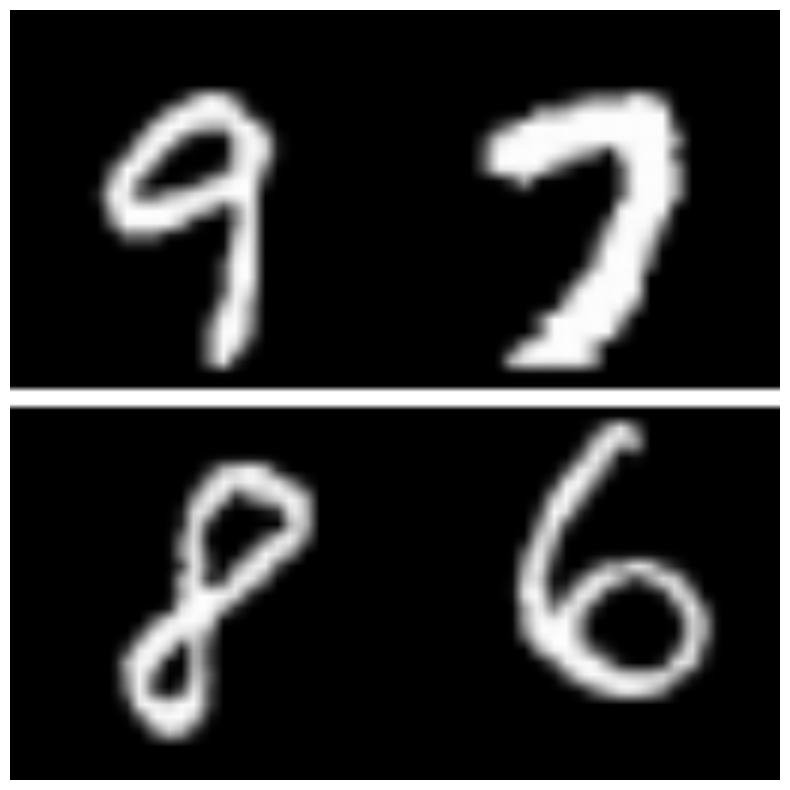

In [33]:
test_pipeline('fraction_56.png')

1/1 [==============================] - 0s 37ms/step


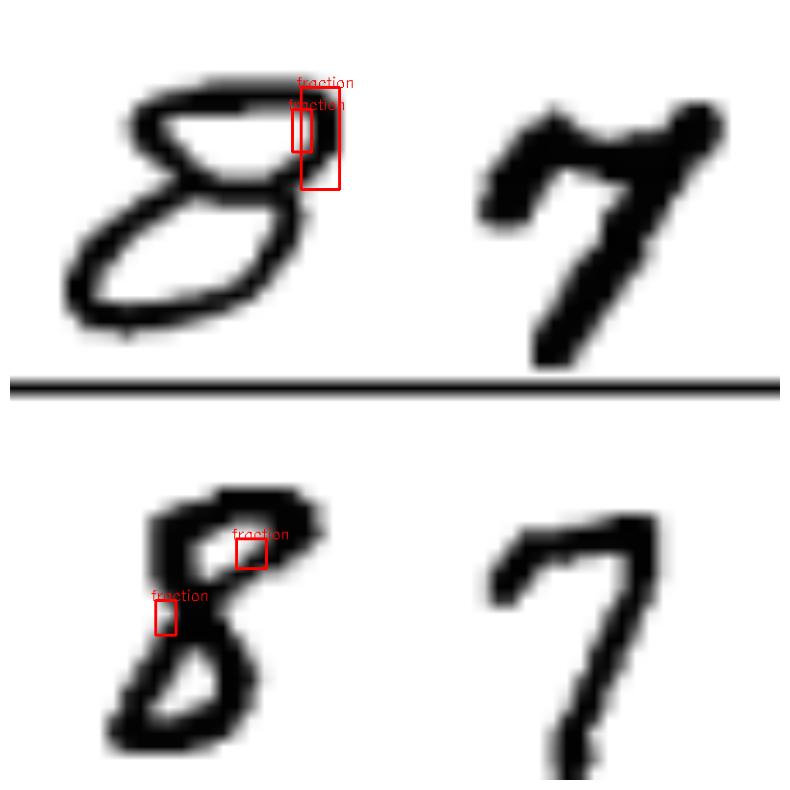

In [35]:
test_pipeline('imgfraction_6.png')